In [1]:
import lib.experimentize as E
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from src.core import Core, Params, DATASETS, FEATURE_SELECTION_METHODS

@E.experimentize(Params)
class Experiment(Core):
    def run(self, *, method=E.param(as_func="feature_selection_{}")):
        train_x, test_x, train_y, test_y = self.train_test_split()
        selector, _ = method(train_x, train_y)
        train_x, test_x = selector(train_x), selector(test_x)

        automl = self.auto_classifier()
        automl.fit(train_x, train_y)
        features = train_x.shape[1]
        return {
            **self.get_scores(test_y, automl.predict(test_x), features),
            "Features": features
        }

def plot(results):
    sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Accuracy", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()
    sns.catplot(
        data=results.prettify(), kind="box",
        x="Features", y="Score", hue="Method",
        height=5, aspect=1.5
    )
    plt.show()

## Artificial dataset

In [5]:
grid = [
    Params(method=method, dataset="artificial", max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for max_features in [5, 10, 15, 20, 30, 40, 50]
    for seed in range(3)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark_artificial.pickle"))()
results

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,artificial,5,0,0.772152,0.772152,5
1,0,Random Forest,artificial,5,1,0.730000,0.730000,5
2,0,Random Forest,artificial,100,0,0.817007,0.627007,100
3,0,Random Forest,artificial,100,1,0.787500,0.597500,100
4,0,ANOVA,artificial,5,0,0.644714,0.644714,5
5,0,ANOVA,artificial,5,1,0.705000,0.705000,5
6,0,ANOVA,artificial,100,0,0.764426,0.574426,100
7,0,ANOVA,artificial,100,1,0.772500,0.582500,100
8,0,Mutual Info,artificial,5,0,0.659266,0.659266,5
9,0,Mutual Info,artificial,5,1,0.647500,0.647500,5


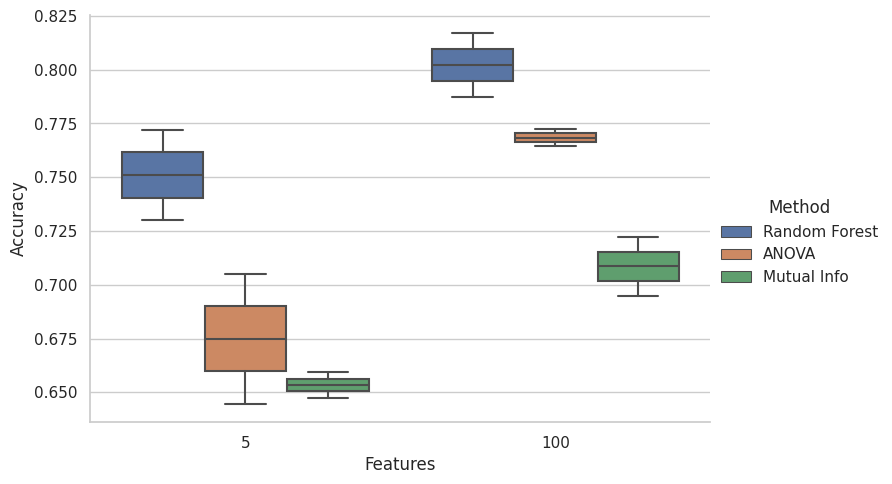

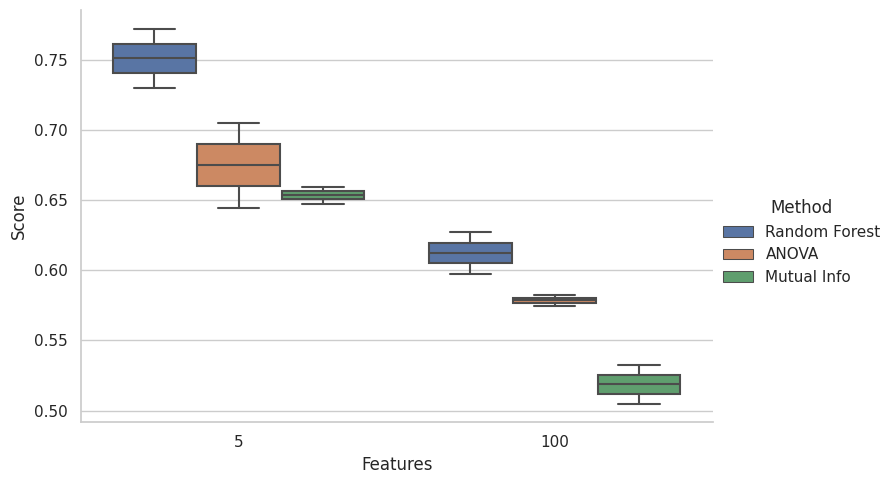

In [6]:
plot(results)

## Spam dataset

In [2]:
grid = [
    Params(method=method, dataset="spam", max_features=max_features, seed=seed)
    for method in FEATURE_SELECTION_METHODS
    for max_features in [100, 150, 200, 250, 300]
    for seed in range(3)
]
results = Experiment().run(E.AsExperiment(grid, with_cache="cache/benchmark_spam.pickle"))()
results

[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 28 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 430 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 369 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 357 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 264 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 254 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 676 not found
[WARNING] [2023-05-27 17:05:43,354:Client-AutoMLSMBO(0)::f341fdf6-fc9f-11ed-abf4-c7fab43069cd] Configuration 648 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 17:07:29,527:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 28 not found
[WARNING] [2023-05-27 17:07:29,527:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 430 not found
[WARNING] [2023-05-27 17:07:29,527:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 369 not found
[WARNING] [2023-05-27 17:07:29,527:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 357 not found
[WARNING] [2023-05-27 17:07:29,527:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 264 not found
[WARNING] [2023-05-27 17:07:29,527:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 254 not found
[WARNING] [2023-05-27 17:07:29,528:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 648 not found
[WARNING] [2023-05-27 17:07:29,528:Client-AutoMLSMBO(0)::3289014b-fca0-11ed-abf4-c7fab43069cd] Configuration 40 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 28 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 430 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 369 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 357 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 264 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 254 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 648 not found
[WARNING] [2023-05-27 17:07:53,202:Client-AutoMLSMBO(1)::40a95fb9-fca0-11ed-abf4-c7fab43069cd] Configuration 40 not found
[WARNING] [2023-05

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 229  492  585 1126 1179 1782 1963 2094 2297] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 17:08:17,396:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 28 not found
[WARNING] [2023-05-27 17:08:17,396:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 430 not found
[WARNING] [2023-05-27 17:08:17,396:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 369 not found
[WARNING] [2023-05-27 17:08:17,396:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 264 not found
[WARNING] [2023-05-27 17:08:17,397:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 254 not found
[WARNING] [2023-05-27 17:08:17,397:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 357 not found
[WARNING] [2023-05-27 17:08:17,397:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 648 not found
[WARNING] [2023-05-27 17:08:17,397:Client-AutoMLSMBO(0)::4f0c79a8-fca0-11ed-abf4-c7fab43069cd] Configuration 635 not found
[WARNING] [2023-0

/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 135  709 1077 1219] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/aurif/.local/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 28 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 430 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 369 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 264 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 357 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 254 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 648 not found
[WARNING] [2023-05-27 17:08:42,854:Client-AutoMLSMBO(1)::5e1bbe56-fca0-11ed-abf4-c7fab43069cd] Configuration 635 not found
[WARNING] [2023-0

,iteration,method,dataset,max_features,seed,Accuracy,Score,Features
0,0,Random Forest,spam,100,0,0.876030,0.876030,100
1,0,Random Forest,spam,100,1,0.939933,0.939933,100
2,0,Random Forest,spam,200,0,0.879955,0.869955,200
3,0,Random Forest,spam,200,1,0.960889,0.950889,200
4,0,ANOVA,spam,100,0,0.879531,0.879531,100
5,0,ANOVA,spam,100,1,0.941195,0.941195,100
6,0,ANOVA,spam,200,0,0.867561,0.857561,200
7,0,ANOVA,spam,200,1,0.944629,0.934629,200
8,0,Mutual Info,spam,100,0,0.855985,0.855985,100
9,0,Mutual Info,spam,100,1,0.921147,0.921147,100


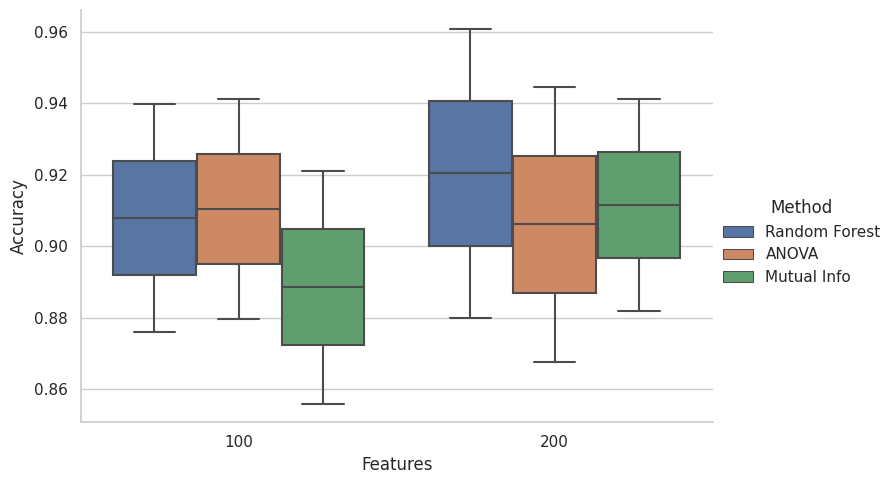

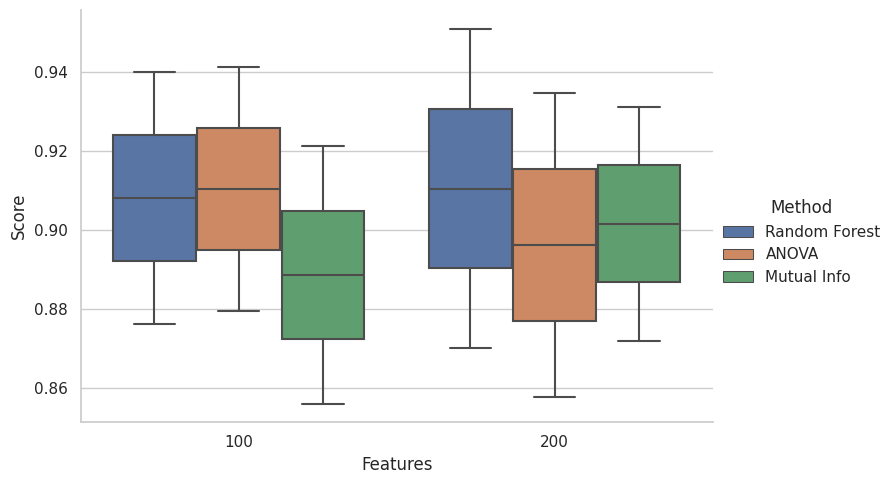

In [3]:
plot(results)